Name - Niyati Trivedi. Student ID - U01870409. Course - CS661-Python Programming (CRN - 22530)

PROJECT 2 -This is the continuation of Project 1 t build Machine Learning models to predict whether 
a customer will churn or not with huge emphasis to recall.

Objective - 1- Build each of the four (4) models independently, by taking the default parameters.
            2- Present the accuracy of each model; list the best model (in terms of ‘recall’ metric)
            3- Tune (Hyperparameter tuning) only the Random Forest and XGBoost Models
            4- Present the accuracy of each model; list the best model (in terms of ‘recall’ metric)
            5- Which of the two stages of analysis produces better results? Which is the best model, overall?

In [1]:
# importing necessary libraries

In [4]:
import os

In [5]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
# importing data

In [7]:
os.chdir('C:/Users/rutik/Downloads')

In [8]:
customer_data=pd.read_csv('telco-customer-churn.csv')

In [9]:
customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
# Here CustomerID represents ID of each customer Since this is Unique for all 7043 records we can ignore this feature so it can be drop.

In [11]:
customer_data=pd.read_csv('telco-customer-churn.csv',na_values=[' '])

In [12]:
# There are 11 null values in Totalcharges.
# Now we will replace null values in TotalCharges by mean value.

In [13]:

customer_data['TotalCharges'].fillna(customer_data['TotalCharges'].mean(),inplace = True)

In [14]:
# So now there is aboslutely NO missing data in our dataset.

In [15]:
# Here CustomerID represents ID of each customer Since this is Unique for all 7043 records we can ignore this feature so it can be drop.

In [16]:
customer_data=customer_data.drop(columns=(['customerID']))

In [17]:
 customer_data=customer_data.drop_duplicates()

In [18]:
# Encode Categorical Feature

In [19]:
customer_data['MultipleLines'].replace('No phone service','No',inplace=True)

In [20]:
customer_data['OnlineSecurity'].replace('No internet service','No',inplace=True)

In [21]:
customer_data['OnlineBackup'].replace('No internet service','No',inplace=True)

In [22]:
customer_data['TechSupport'].replace('No internet service','No',inplace=True)

In [23]:
customer_data['StreamingTV'].replace('No internet service','No',inplace=True)

In [24]:
customer_data['StreamingMovies'].replace('No internet service','No',inplace=True)

In [25]:
customer_data['DeviceProtection'].replace('No internet service','No',inplace=True)

In [26]:
customer_data['OnlineBackup'].replace({'Yes':1,'No':0},inplace=True)

In [27]:
customer_data['DeviceProtection'].replace({'Yes':1,'No':0},inplace=True)

In [28]:
customer_data['TechSupport'].replace({'Yes':1,'No':0},inplace=True)

In [29]:
customer_data['StreamingTV'].replace({'Yes':1,'No':0},inplace=True)

In [30]:
customer_data['StreamingMovies'].replace({'Yes':1,'No':0},inplace=True)

In [31]:
customer_data['PhoneService'].replace({'Yes':1,'No':0},inplace=True)

In [32]:
customer_data['Dependents'].replace({'Yes':1,'No':0},inplace=True)

In [33]:
customer_data['Partner'].replace({'Yes':1,'No':0},inplace=True)

In [34]:
customer_data['gender'].replace({'Male':1,'Female':0},inplace=True)

In [35]:
customer_data['PaperlessBilling'].replace({'Yes':1,'No':0},inplace=True)

In [36]:
customer_data['Churn'].replace({'Yes':1,'No':0},inplace=True)

In [37]:
customer_data['SeniorCitizen'].replace({'Yes':1,'No':0},inplace=True)

In [38]:
customer_data['MultipleLines'].replace({'Yes':1,'No':0},inplace=True)

In [39]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   int64  
 10  DeviceProtection  7021 non-null   int64  
 11  TechSupport       7021 non-null   int64  
 12  StreamingTV       7021 non-null   int64  
 13  StreamingMovies   7021 non-null   int64  
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   object 


In [40]:
# Converting remaining categorical variables to dumy Variable

In [41]:
customer_data=pd.get_dummies(customer_data)

In [42]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7021 non-null   int64  
 1   SeniorCitizen                            7021 non-null   int64  
 2   Partner                                  7021 non-null   int64  
 3   Dependents                               7021 non-null   int64  
 4   tenure                                   7021 non-null   int64  
 5   PhoneService                             7021 non-null   int64  
 6   MultipleLines                            7021 non-null   int64  
 7   OnlineBackup                             7021 non-null   int64  
 8   DeviceProtection                         7021 non-null   int64  
 9   TechSupport                              7021 non-null   int64  
 10  StreamingTV                              7021 no

In [43]:
http://localhost:8889/notebooks/Downloads/Rutik%20Rajeshkumar%20Kothwala%20Project-2%20.ipynb#Feature-Selection# so now our entire dataset is numeric

# Feature Selection

In [44]:
from sklearn.metrics import mutual_info_score

In [45]:
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, customer_data.Churn)

In [46]:
# select  variables excluding the response variable b

In [47]:
customer_data2= customer_data.drop(columns=(['Churn']))

In [48]:
# compute the mutual information score between each categorical variable and the target
feature_importance = customer_data2.apply(compute_mutual_information).sort_values(ascending=False)

C:\Users\rutik\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\rutik\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [49]:
print(feature_importance)

TotalCharges                               0.537097
MonthlyCharges                             0.173747
Contract_Month-to-month                    0.091714
tenure                                     0.079045
Contract_Two year                          0.060494
InternetService_Fiber optic                0.047870
PaymentMethod_Electronic check             0.043807
InternetService_No                         0.031664
PaperlessBilling                           0.019009
Contract_One year                          0.017958
OnlineSecurity_No                          0.015747
OnlineSecurity_Yes                         0.015747
TechSupport                                0.014471
Dependents                                 0.014326
Partner                                    0.011249
SeniorCitizen                              0.010674
PaymentMethod_Credit card (automatic)      0.009736
InternetService_DSL                        0.008010
PaymentMethod_Bank transfer (automatic)    0.007382
PaymentMetho

In [50]:
# So As Shown above gender,PhoneService, and MultipleLines have a mutualinformation close to 0 
# Implies that those variables do not have a strong relationship with the target.
# So we can remove those variables.

In [51]:
customer_data= customer_data.drop(columns=(['gender']))
customer_data= customer_data.drop(columns=(['PhoneService']))
customer_data= customer_data.drop(columns=(['MultipleLines']))

In [52]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7021 non-null   int64  
 1   Partner                                  7021 non-null   int64  
 2   Dependents                               7021 non-null   int64  
 3   tenure                                   7021 non-null   int64  
 4   OnlineBackup                             7021 non-null   int64  
 5   DeviceProtection                         7021 non-null   int64  
 6   TechSupport                              7021 non-null   int64  
 7   StreamingTV                              7021 non-null   int64  
 8   StreamingMovies                          7021 non-null   int64  
 9   PaperlessBilling                         7021 non-null   int64  
 10  MonthlyCharges                           7021 no

# Normalization

In [53]:
from sklearn import preprocessing

In [54]:
scaler = preprocessing.MinMaxScaler()

In [55]:
names = customer_data.columns

In [56]:
d = scaler.fit_transform(customer_data)
df_telco_transformed = pd.DataFrame(d, columns=names)
df_telco_transformed.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,...,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.013889,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.472222,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.625000,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.027778,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
# select independent variables
X = df_telco_transformed.drop(columns='Churn')

# select dependent variables
y = df_telco_transformed.loc[:, 'Churn']

In [58]:
X.shape

(7021, 24)

In [59]:
y.shape

(7021,)

In [60]:
# importing necessary libraries

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import mean
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve,auc,f1_score,plot_confusion_matrix,precision_score,recall_score

In [62]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    )

# Model Evaluation

In [63]:
# Logistic Regression

In [64]:
logisticModel = LogisticRegression()

In [65]:
lr=logisticModel.fit(X_train,y_train)

In [66]:
# Logistic Model Evaluation

In [67]:
print("Intercept: ",logisticModel.intercept_)

Intercept:  [-1.16625195]


In [68]:
y_pred1_test= logisticModel.predict(X_test)

In [69]:
print(classification_report(y_test,y_pred1_test))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1023
         1.0       0.68      0.54      0.60       382

    accuracy                           0.81      1405
   macro avg       0.76      0.72      0.74      1405
weighted avg       0.80      0.81      0.80      1405



In [70]:
# Confusion matrix

In [71]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred1_test)

In [72]:
print(confusion_matrix)

[[925  98]
 [175 207]]


In [73]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

In [74]:

# Test function

calc_precision_recall(y_test, y_pred1_test)

(0.6786885245901639, 0.5418848167539267)

C:\Users\rutik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


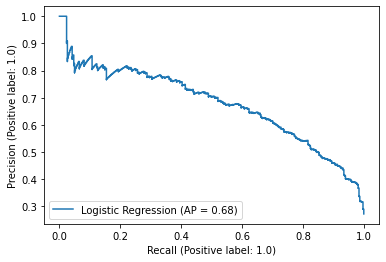

In [75]:
# Use sklearn to plot precision-recall curves

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(lr, X_test, y_test, name = 'Logistic Regression')

In [76]:
# ROC curve 

In [77]:
#define metrics
y_pred_proba = logisticModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

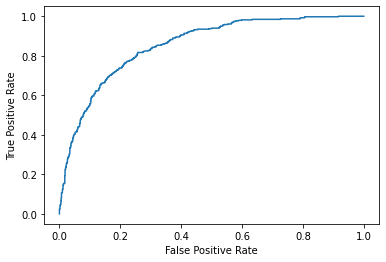

In [78]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

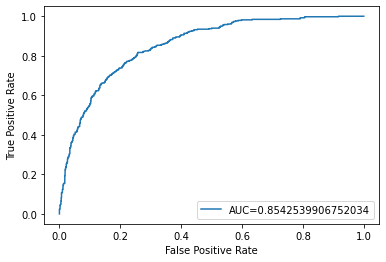

In [79]:
#define metrics
y_pred_proba = logisticModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AOC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [80]:
# Randforest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
clf=RandomForestClassifier()

In [83]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
y_pred2_test=clf.predict(X_test)

In [85]:
print(classification_report(y_test,y_pred2_test))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      1023
         1.0       0.63      0.49      0.55       382

    accuracy                           0.78      1405
   macro avg       0.72      0.69      0.70      1405
weighted avg       0.77      0.78      0.77      1405



In [86]:
# Confusion matrix

In [87]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2_test)

In [88]:
print(confusion_matrix)

[[912 111]
 [196 186]]


In [89]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

In [90]:

# Test function
calc_precision_recall(y_test, y_pred2_test)

(0.6262626262626263, 0.4869109947643979)

C:\Users\rutik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


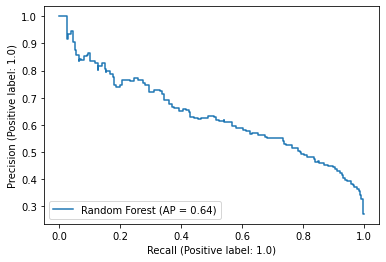

In [91]:
plot_precision_recall_curve(clf, X_test, y_test, name = 'Random Forest')

In [92]:
# ROC curve 

In [93]:
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

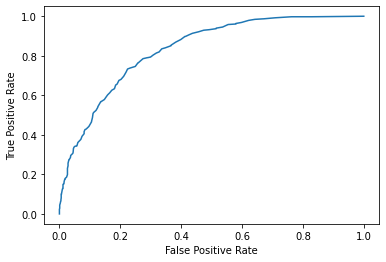

In [94]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

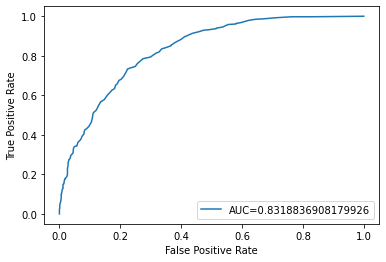

In [95]:
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [96]:
# Gaussian matrix

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
model=  GaussianNB()
model

GaussianNB()

In [99]:
model.fit(X_train,y_train)

GaussianNB()

In [100]:
y_pred3_test=model.predict(X_test)

In [101]:
prediction3= model.predict(X_test)

In [102]:
print(classification_report(y_test,y_pred3_test))

              precision    recall  f1-score   support

         0.0       0.90      0.73      0.81      1023
         1.0       0.52      0.80      0.63       382

    accuracy                           0.74      1405
   macro avg       0.71      0.76      0.72      1405
weighted avg       0.80      0.74      0.76      1405



In [103]:
# confusion matrix

In [104]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred3_test)

In [105]:
print(confusion_matrix)

[[742 281]
 [ 78 304]]


In [106]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

In [107]:

# Test function
calc_precision_recall(y_test, y_pred3_test)

(0.5196581196581197, 0.7958115183246073)

In [108]:
# precison recall curve

C:\Users\rutik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


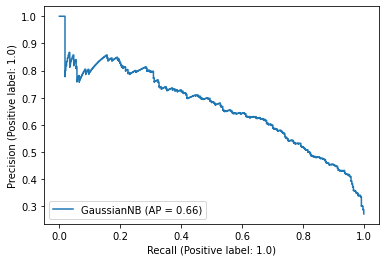

In [109]:
plot_precision_recall_curve(model, X_test, y_test, name = 'GaussianNB')

In [110]:
# ROC CURVE

In [111]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

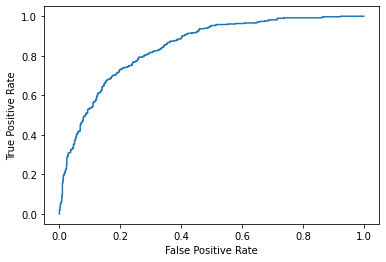

In [112]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

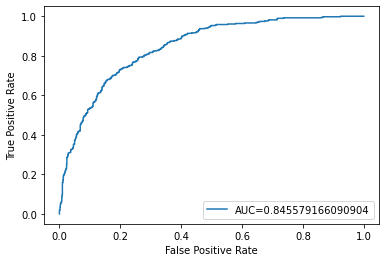

In [113]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [114]:
# XGBOOST

In [115]:
pip install XGBOOST

Note: you may need to restart the kernel to use updated packages.


In [116]:
import xgboost as xgb

In [117]:
from xgboost import XGBClassifier

In [118]:
modelxg= XGBClassifier()

In [119]:
modelxg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [120]:
y_pred4_test= modelxg.predict(X_test)

In [121]:
print(classification_report(y_test,y_pred4_test))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1023
         1.0       0.61      0.52      0.56       382

    accuracy                           0.78      1405
   macro avg       0.72      0.70      0.71      1405
weighted avg       0.77      0.78      0.77      1405



In [122]:
# Confusion matrix

In [123]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred4_test)

In [124]:
print(confusion_matrix)

[[895 128]
 [182 200]]


In [125]:
# Test function
calc_precision_recall(y_test, y_pred4_test)

(0.6097560975609756, 0.5235602094240838)

C:\Users\rutik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


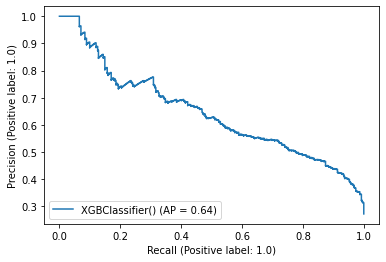

In [126]:
plot_precision_recall_curve(modelxg, X_test, y_test, name = 'XGBClassifier()')

In [1]:
#define metrics
y_pred_proba = modelxg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

NameError: name 'modelxg' is not defined

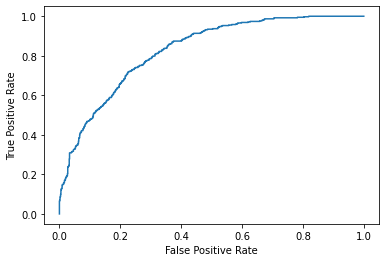

In [128]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

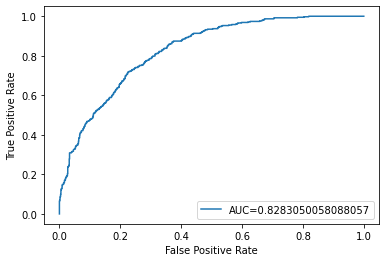

In [129]:
#define metrics
y_pred_proba = modelxg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Hyperperameter tunning

In [130]:
# Random Forest(optimized)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [131]:
param_grid_rf = {'n_estimators': np.arange(10, 2000, 10),
'max_features': ['auto', 'sqrt'],
'max_depth': np.arange(10, 200, 10), 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]}

In [132]:
rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

C:\Users\rutik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rutik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rutik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  21...
       1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320,
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540,
       1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650,
       1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760,
       1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870,
       1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980,
       1990])})

In [133]:
# Make predictions (classes and probabilities) with the trained model on the test set.

In [134]:
y_pred_rf_tuned = rf_random_grid.predict(X_test)

In [135]:
y_pred6_test= rf_random_grid.predict(X_test)
print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 710, 'max_features': 'auto', 'max_depth': 170, 'criterion': 'gini', 'bootstrap': True}


In [136]:
print(classification_report(y_test,y_pred6_test))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1023
         1.0       0.62      0.51      0.56       382

    accuracy                           0.78      1405
   macro avg       0.73      0.70      0.71      1405
weighted avg       0.77      0.78      0.78      1405



In [137]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred6_test)
print(confusion_matrix)

[[906 117]
 [187 195]]


In [138]:
# Test function
calc_precision_recall(y_test, y_pred6_test)

(0.625, 0.5104712041884817)

In [139]:
# Hypertunning for XGBOOST

In [198]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [147]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1)

In [148]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb,  n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

In [149]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001A55F972580>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, verbose=3)

In [150]:
  prediction_7 =random_search .predict(X_test)

In [151]:
print(classification_report(y_test,prediction_7))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1023
         1.0       0.71      0.54      0.62       382

    accuracy                           0.82      1405
   macro avg       0.78      0.73      0.75      1405
weighted avg       0.81      0.82      0.81      1405



# model Evaluation after applying SMOTE technique

In [152]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [153]:
from imblearn.over_sampling import SMOTE

In [154]:
X_resampled,y_resampled = SMOTE().fit_resample(X,y)

In [155]:
X_resampled.shape

(10328, 24)

In [156]:
X_resampled.shape,y_resampled.shape

((10328, 24), (10328,))

In [157]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='Churn'>

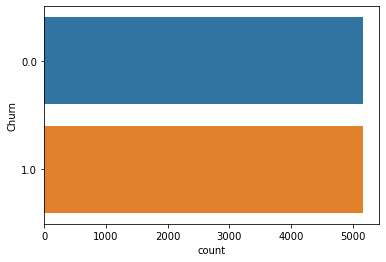

In [158]:
sns.countplot(y=y_resampled)

In [159]:
X_train, X_test, y_train, y_test = train_test_split( X_resampled, y_resampled, test_size=0.2, random_state=0)

In [160]:
#LogisticRegression

In [161]:
logisticModel.fit(X_train,y_train)

LogisticRegression()

In [162]:
prediction1= logisticModel.predict(X_test)
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75       965
         1.0       0.77      0.83      0.80      1101

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



In [163]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, prediction1)
print(confusion_matrix)

[[693 272]
 [182 919]]


In [164]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

In [165]:
# Test function
calc_precision_recall(y_test,prediction1)

(0.7716204869857263, 0.8346957311534968)

In [166]:
#RandomForest

In [167]:
clf=RandomForestClassifier()

In [168]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [169]:
prediction2= clf.predict(X_test)
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       965
         1.0       0.85      0.89      0.87      1101

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



In [170]:
# Test function
calc_precision_recall(y_test,prediction2)

(0.8470894874022589, 0.885558583106267)

In [171]:
model=  GaussianNB()

In [172]:
model.fit(X_train,y_train)

GaussianNB()

In [173]:
prediction3= model.predict(X_test)

print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74       965
         1.0       0.76      0.83      0.79      1101

    accuracy                           0.77      2066
   macro avg       0.77      0.76      0.77      2066
weighted avg       0.77      0.77      0.77      2066



In [174]:
# Test function
calc_precision_recall(y_test,prediction3)

(0.7563786008230453, 0.8346957311534968)

In [175]:
# XGBOOST

In [176]:
modelxg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [177]:
prediction4= modelxg.predict(X_test)
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       965
         1.0       0.84      0.88      0.86      1101

    accuracy                           0.85      2066
   macro avg       0.85      0.84      0.84      2066
weighted avg       0.85      0.85      0.85      2066



In [178]:
# Test function
calc_precision_recall(y_test,prediction4)

(0.84, 0.8773841961852861)

# Hypertunning after applying SMOTE

In [180]:
# Random_Forest

In [181]:
param_grid_rf = {'n_estimators': np.arange(10, 2000, 10),
'max_features': ['auto', 'sqrt'],
'max_depth': np.arange(10, 200, 10), 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]}

In [182]:
rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

C:\Users\rutik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rutik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rutik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  21...
       1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320,
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540,
       1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650,
       1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760,
       1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870,
       1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980,
       1990])})

In [183]:
y_pred_rf_tuned = rf_random_grid.predict(X_test)

In [184]:
y_pred6_test= rf_random_grid.predict(X_test)
print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 980, 'max_features': 'auto', 'max_depth': 160, 'criterion': 'entropy', 'bootstrap': True}


In [185]:
print(classification_report(y_test,y_pred6_test))

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84       965
         1.0       0.85      0.89      0.87      1101

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



In [186]:
# Test function
calc_precision_recall(y_test, y_pred6_test)

(0.8469475494411006, 0.8946412352406903)

In [187]:
# Hypertunning for XGBoost after applying SMOTE TECHNIQUE

In [192]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [193]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1)

In [9]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb,  n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

NameError: name 'StratifiedKFold' is not defined

In [195]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001A560AF4270>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, verbose=3)

In [196]:
print(classification_report(y_test,prediction_7))

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       965
         1.0       0.85      0.89      0.87      1101

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



In [6]:
os.chdir('C:/Users/rutik/Downloads')

In [7]:
result=pd.read_csv('result.csv')

In [8]:
result

,Model,Smote,Hyperperameter Tunning,Recall (for 1),Weighted Avg Recall,Macro Avg Recall,Accuracy
0,logistic_ regression,No,No,0.54,0.81,0.72,0.81
1,random _forests,No,No,0.49,0.78,0.69,0.78
2,naïve_ bayes,No,No,0.80,0.74,0.76,0.74
3,xgboost,No,No,0.52,0.78,0.70,0.78
4,random_ forests,No,Yes,0.51,0.78,0.70,0.78
5,xgboost,No,Yes,0.54,0.82,0.73,0.82
6,logistic _regression,Yes,No,0.83,0.78,0.78,0.78
7,random_ forests,Yes,No,0.89,0.85,0.85,0.85
8,naïve_ bayes,Yes,No,0.83,0.76,77.00,0.77
9,xgboost,Yes,No,0.87,0.84,0.84,0.84


# Conclusion:- 
                         We will choose best performance model with huge emphasis to Recall 
                         So from the above result table we can conclude that 
                        1) From all the ML models naïve_ bayes  works best when models evaluation is done without SMOTE.
                        2) It is also observed that all the models gives better results after applying SMOTE.
                        3) When Models are evaluated after SMOTE Random Forest is the best model.
                        3) We can see that all the models gives better results after applying SMOTE.
                        4) After Hyperperameter tunning of Random Forest and XGBOOST not much difference is observed ,there
                           is a slight increased in both recall and accuracy.

In [ ]:
# Hence all the Objectives of the project are satisfied